<a href="https://colab.research.google.com/github/manjitullal/unsupervised/blob/main/Manjit_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 SVD
You are given the following matrix:

>$M =
 \begin{pmatrix}
  1 & 2 & 3 \\
  3 & 4 & 5 \\
  5 & 4 & 3 \\
  0 & 2 & 4 \\
  1 & 3 & 5  
 \end{pmatrix}$

1. What is the rank of M?

2. Compute the matrices $M^TM$ and $MM^T$ .
3. Find the eigenvalues and eigenvectors of the matrices from the previous part.
4. Find the SVD of the matrix M based on your previous answers.
5. Set the smallest singular value to 0 and compute the approximation to the matrix M.
6. How much of the energy of the original singular values is retained by the approximation?

In [ ]:
import numpy as np
from numpy import linalg as LA
from scipy import linalg
from scipy.linalg import lu

m = np.array([[1, 2, 3], [3, 4, 5], [5, 4, 3], [0, 2, 4], [1, 3, 5]])

#### 1.1
Rank is 2 since the row echelon form has only 2 rows


In [ ]:
p, l, u = lu(m)
print('row echelon form of matrix m')
print(u)

row echelon form of matrix m
[[5.  4.  3. ]
 [0.  2.2 4.4]
 [0.  0.  0. ]]


#### 1.2

In [ ]:
print("Answer: 2")
mt_m = np.dot(m.transpose(),m)
print("M transpose x M")
print(mt_m)
print('\n')
m_mt = np.dot(m, m.transpose())
print("M x M transpose")
print(m_mt)
print('\n')

Answer: 2
M transpose x M
[[36 37 38]
 [37 49 61]
 [38 61 84]]


M x M transpose
[[14 26 22 16 22]
 [26 50 46 28 40]
 [22 46 50 20 32]
 [16 28 20 20 26]
 [22 40 32 26 35]]




#### 1.3

In [ ]:
print("Answer: 3")
eig_values, eig_vectors = LA.eig(mt_m)
print("Eigen values of M transpose x M")
print(eig_values)
print('\n')
print("Eigen vectors of M transpose x M")
print(eig_vectors)
print('\n')

eig_values, eig_vectors = LA.eig(m_mt)
print("Eigen values of M x M transpose")
print(eig_values)
print('\n')
print("Eigen vectors of M x M transpose")
print(eig_vectors)
print('\n')

Answer: 3
Eigen values of M transpose x M
[1.53566996e+02 1.54330035e+01 4.80589926e-15]


Eigen vectors of M transpose x M
[[-0.40928285 -0.81597848  0.40824829]
 [-0.56345932 -0.12588456 -0.81649658]
 [-0.7176358   0.56420935  0.40824829]]


Eigen values of M x M transpose
[ 1.53566996e+02 -1.03322028e-14  1.54330035e+01  2.54653026e-15
 -3.61063094e-15]


Eigen vectors of M x M transpose
[[ 0.29769568  0.94131607 -0.15906393  0.12508859  0.07520849]
 [ 0.57050856 -0.17481584  0.0332003  -0.45318832 -0.07287035]
 [ 0.52074297 -0.04034212  0.73585663  0.32553276 -0.10566284]
 [ 0.32257847 -0.18826321 -0.5103921   0.72000366 -0.72571726]
 [ 0.45898491 -0.21515796 -0.41425998 -0.39318742  0.67171677]]




#### 1.4

U is the left singluar matrix 

s is sigma 

Vh is the right singular matrix 

note that U, s and Vh are found directly from the scipy package as finding these using the above eigen vectors is quite tricky and complex as per piazza post 

In [ ]:
print("Answer: 4")
U, s, Vh = linalg.svd(m)

print(U)
print('\n')
print(s)

print('\n')
print(Vh)

Answer: 4
[[-0.29769568  0.15906393  0.90607622  0.10832614  0.23101361]
 [-0.57050856 -0.0332003   0.03827317 -0.55736004 -0.60108458]
 [-0.52074297 -0.73585663 -0.13315536  0.36772575  0.18544323]
 [-0.32257847  0.5103921  -0.18363343  0.68325461 -0.36726685]
 [-0.45898491  0.41425998 -0.35511895 -0.27487478  0.64502396]]


[1.23922152e+01 3.92848616e+00 5.73316705e-16]


[[-0.40928285 -0.56345932 -0.7176358 ]
 [-0.81597848 -0.12588456  0.56420935]
 [-0.40824829  0.81649658 -0.40824829]]


#### 1.5

the lowest value of the sigma is marked to zero 

In [ ]:
orig_s = s.copy()
min_flag = np.logical_not(s > np.min(s))
s[min_flag] = 0
print(s)
print('\n')
print("Answer: 5")
print('\n')
sigma = np.zeros((5, 3))
for i in range(min(3, 5)):
    sigma[i, i] = s[i]
approximation = np.dot(U, np.dot(sigma, Vh))
print(approximation)

[12.39221516  3.92848616  0.        ]


Answer: 5


[[1.00000000e+00 2.00000000e+00 3.00000000e+00]
 [3.00000000e+00 4.00000000e+00 5.00000000e+00]
 [5.00000000e+00 4.00000000e+00 3.00000000e+00]
 [5.18440612e-16 2.00000000e+00 4.00000000e+00]
 [1.00000000e+00 3.00000000e+00 5.00000000e+00]]


#### 1.6 
100% of the energy is retained 

In [ ]:
print("Answer: 6")

energy = np.sum([i**2 for i in s])/np.sum([i**2 for i in orig_s])

print(np.allclose(m, approximation))
print('\n')
print(energy*100)

Answer: 6
True


100.0


# 2 EigenFaces

In this exercise you will apply PCA to images of faces. The Labeled Faces in the Wild (LFW)
face recognition dataset contains face images of 5749 famous people collected over the internet.
Each image is of size 62 x 47 pixels. This dataset can be downloaded by calling the function
sklearn.datasets.fetch_lfw_people().
1. Load the data and display a few faces to make sure you understand the data format.
2. Display the firrst 10 principal components of the data. These should be vectors of length
62 x 47 = 2914, so you can reshape them and view them as face images just like the
original data. These types of images are often called "eigenfaces".
3. Plot the cumulative variance explained by the principal components as a function of the
number of components.
4. How many principal components are needed to retain 95% of the variance?
5. Choose any 3 faces and reconstruct them using the first k principal components, for
k = 5; 10; 50; 100.
6. Train a classifier on the images after reducing them to the number of dimensions you
have found in part 4 (you can choose any classifier to your liking). How does the
classification result compare to the classification on the original images?

In [100]:
import sklearn
from sklearn import datasets
data = sklearn.datasets.fetch_lfw_people()

#### 2.1

Load the data and view few images

In [ ]:
n_samples, h, w = data.images.shape
X = data.data

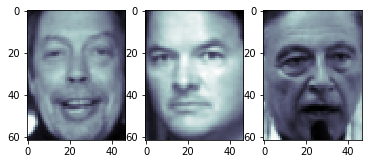

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, nrows=1)
axes[0].imshow(X[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')   
axes[1].imshow(X[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
from sklearn import decomposition
pca_output = decomposition.PCA(n_components=10, whiten=True)
pca_output.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

#### 2.2

First 10 principal components and the eigen faces 

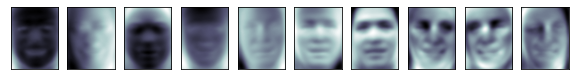

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca_output.components_[i].reshape(h,w),cmap=plt.cm.bone)

mean eigen face

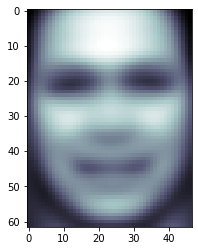

In [ ]:
plt.imshow(pca_output.mean_.reshape(h,w),cmap=plt.cm.bone)

#### 2.3

we can see below that 10 principal components explains only 62% of variance

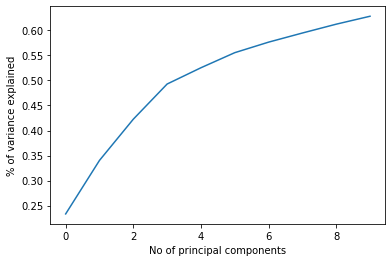

In [ ]:
x = np.arange(10)
y = pca_output.explained_variance_ratio_.tolist()
plt.plot(x,np.cumsum(y))
plt.xlabel("No of principal components")
plt.ylabel("% of variance explained")
plt.show()

#### 2.4
200 components explain 95% of the variance

we can experiment around 180-200 to get the excat number of components

In [ ]:
%timeit

no_of_components = [75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
variances = {}

for i in no_of_components:
  pca_output = decomposition.PCA(n_components=i, whiten=True)
  pca_output.fit(X)
  variances[i] = np.sum(pca_output.explained_variance_ratio_.tolist())

print(variances)

{75: 0.8842292592162266, 100: 0.9099459545104764, 125: 0.9273837017244659, 150: 0.9399878302356228, 175: 0.9494595951109659, 200: 0.9568573657597881, 225: 0.9627808830264257, 250: 0.9676090451976052, 275: 0.9715927209035726, 300: 0.9747467135603074}


#### 2.5
Four PCA transformations for different values of k are done and then the outputs can be viwed below 

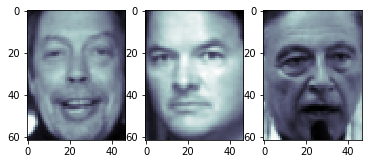

In [ ]:
# 3 original faces

fig, axes = plt.subplots(ncols=3, nrows=1)
axes[0].imshow(X[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')   
axes[1].imshow(X[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca_5 = PCA(5) 
pca_10 = PCA(10)
pca_50 = PCA(50)
pca_100 = PCA(100)

X_proj5 = pca_5.fit_transform(X)
X_proj10 = pca_10.fit_transform(X)
X_proj50 = pca_50.fit_transform(X)
X_proj100 = pca_100.fit_transform(X)

print(X_proj5.shape, X_proj10.shape, X_proj50.shape, X_proj100.shape, end=' ')
print('\n')
print(round(np.sum(pca_5.explained_variance_ratio_)*100), round(np.sum(pca_10.explained_variance_ratio_)*100), 
      round(np.sum(pca_50.explained_variance_ratio_)*100), round(np.sum(pca_100.explained_variance_ratio_)*100), end=' ')

(13233, 5) (13233, 10) (13233, 50) (13233, 100) 

53.0 63.0 84.0 91.0 

<Figure size 720x720 with 0 Axes>

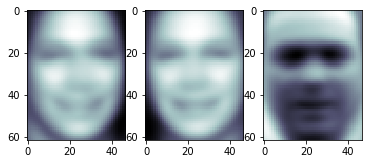

<Figure size 720x720 with 0 Axes>

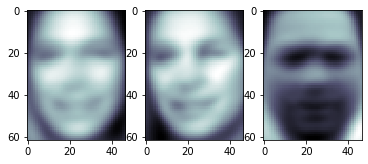

<Figure size 720x720 with 0 Axes>

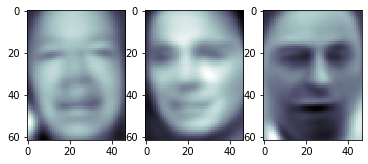

<Figure size 720x720 with 0 Axes>

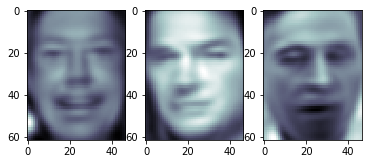

In [ ]:
X_inv_proj5 = pca_5.inverse_transform(X_proj5) 
X_proj_img5 = np.reshape(X_inv_proj5,(-1,h,w)) 

X_inv_proj10 = pca_10.inverse_transform(X_proj10) 
X_proj_img10 = np.reshape(X_inv_proj10,(-1,h,w)) 

X_inv_proj50 = pca_50.inverse_transform(X_proj50) 
X_proj_img50 = np.reshape(X_inv_proj50,(-1,h,w)) 

X_inv_proj100 = pca_100.inverse_transform(X_proj100) 
X_proj_img100 = np.reshape(X_inv_proj100,(-1,h,w)) 

fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(ncols=3, nrows=1)

axes[0].imshow(X_inv_proj5[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[1].imshow(X_inv_proj5[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X_inv_proj5[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(ncols=3, nrows=1)

axes[0].imshow(X_inv_proj10[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[1].imshow(X_inv_proj10[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X_inv_proj10[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(ncols=3, nrows=1)

axes[0].imshow(X_inv_proj50[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[1].imshow(X_inv_proj50[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X_inv_proj50[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

fig = plt.figure(figsize=(10,10))
fig, axes = plt.subplots(ncols=3, nrows=1)

axes[0].imshow(X_inv_proj100[0].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[1].imshow(X_inv_proj100[10].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')
axes[2].imshow(X_inv_proj100[20].reshape(h, w), cmap=plt.cm.bone, interpolation='nearest')

#### 2.6

Classification on the reduced dataset takes few minutes however model takes 20 minutes plus on original dataset and does not produce satisfactory results.200 component PCA reduced dataset along with SVM classifier on 12 classes produces the results below. We can infer from this that PCA is necessary to reduce the dimension before doing the classification.

In [159]:
X = data.data
y = data.target
target_names = data.target_names

n_classes = target_names.shape[0]
n_features = X.shape[1]
print(n_classes, n_features)

5749 2914


In [160]:
print(X.shape, y.shape)

(13233, 2914) (13233,)


The dataset has many samples with less images. Only classes with more than 50 images are selected

In [161]:
counter = {}
for element in y:
  if element in counter:
    counter[element] +=1
  else:
    counter[element] = 1
    
valid_keys = [key for key in counter if counter[key] >=50]
valid_indices = [index for index, key in enumerate(y) if key in valid_keys]

In [162]:
X = X[valid_indices]
y = y[valid_indices]
valid_y = list(set(y))
target_names = [key for index, key in enumerate(target_names) if index in valid_y]

In [163]:
print(X.shape, y.shape)

(1560, 2914) (1560,)


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

n_components = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [170]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.53      0.62        19
     Colin Powell       0.72      0.92      0.81        53
  Donald Rumsfeld       0.72      0.76      0.74        34
    George W Bush       0.85      0.91      0.88       135
Gerhard Schroeder       0.77      0.79      0.78        29
      Hugo Chavez       0.94      0.73      0.82        22
   Jacques Chirac       0.50      0.23      0.32        13
    Jean Chretien       0.82      0.60      0.69        15
    John Ashcroft       0.77      0.83      0.80        12
Junichiro Koizumi       0.89      0.89      0.89        18
  Serena Williams       1.00      0.53      0.70        15
       Tony Blair       0.72      0.72      0.72        25

         accuracy                           0.80       390
        macro avg       0.79      0.70      0.73       390
     weighted avg       0.80      0.80      0.79       390



In [168]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        19
     Colin Powell       0.00      0.00      0.00        53
  Donald Rumsfeld       0.00      0.00      0.00        34
    George W Bush       0.35      1.00      0.51       135
Gerhard Schroeder       0.00      0.00      0.00        29
      Hugo Chavez       0.00      0.00      0.00        22
   Jacques Chirac       0.00      0.00      0.00        13
    Jean Chretien       0.00      0.00      0.00        15
    John Ashcroft       0.00      0.00      0.00        12
Junichiro Koizumi       0.00      0.00      0.00        18
  Serena Williams       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        25

         accuracy                           0.35       390
        macro avg       0.03      0.08      0.04       390
     weighted avg       0.12      0.35      0.18       390



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3 t-SNE
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result. You can
use a scatter plot using 10 different colors to represent each image's target class. Alternatively,
you can replace the dots in the scatter plot with scaled-down versions of the digit images
themselves. If you plot all digits, the visualization will be too cluttered, so you should either
draw a random sample or plot an instance only if no other instance has already been plotted
at a close distance. You should get a nice visualization with well-separated clusters of digits.
The MNIST dataset can be downloaded using the following code:
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

In [ ]:
import sklearn
from sklearn import datasets
X, y = sklearn.datasets.fetch_openml('mnist_784', return_X_y=True)

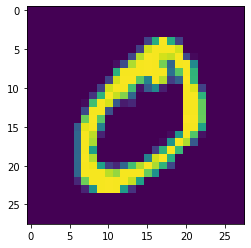

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X[1].reshape(28, 28), interpolation='nearest')
plt.show()

Perform PCA to reduce the dimension of the image and then sample random imagaes from the PCA to feed into TSNE. We select random 10000 samples from PCA because TSNE otherwise runs very slow on the original datasets which is large.

In [ ]:
from sklearn import decomposition
pca_output_mnist = decomposition.PCA(n_components=10, whiten=True)
pca_output_mnist = pca_output_mnist.fit_transform(X)

In [ ]:
%timeit
import numpy as np
from sklearn.manifold import TSNE

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000 

X_tsne = TSNE(n_components=2, init='pca', random_state=0)
tsne_results = X_tsne.fit_transform(pca_output_mnist[rows[:n_select],:])

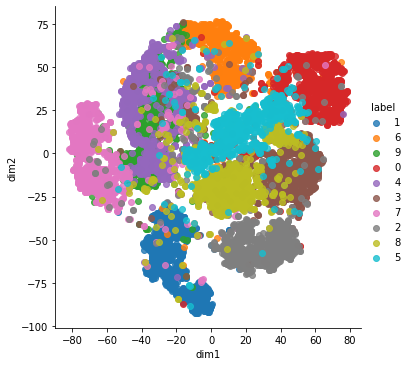

In [ ]:
import pandas as pd
import seaborn as sns

df_tsne = pd.DataFrame(tsne_results, columns=['dim1', 'dim2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='dim1', y='dim2', data=df_tsne, hue='label', fit_reg=False)